In [15]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
Utrecht = pd.read_csv('Utrecht.csv', encoding='utf-8')
print( Utrecht )

     tomt  bo_yta  balkong    ar  pris
0    55.6   93.60        0  1935   568
1   115.3  111.60        1  1927   649
2    66.0  117.00        0  1941   716
3   102.1  141.75        1  1940   825
4   142.6  182.25        1  1960  1015
..    ...     ...      ...   ...   ...
95  119.9  153.00        1  2004   792
96   73.0   98.55        0  2007   497
97   90.3  154.80        1  1958   908
98  131.9  196.20        1  1956  1198
99  131.4  156.60        1  1964   924

[100 rows x 5 columns]


In [17]:
print(Utrecht[Utrecht['balkong']==1]['pris'].describe())
print(Utrecht[Utrecht['balkong']==0]['pris'].describe())

count      81.000000
mean      801.222222
std       185.715845
min       440.000000
25%       671.000000
50%       792.000000
75%       908.000000
max      1339.000000
Name: pris, dtype: float64
count      19.000000
mean      701.736842
std       177.449787
min       466.000000
25%       534.000000
50%       706.000000
75%       790.500000
max      1070.000000
Name: pris, dtype: float64


In [ ]:
#Enkel regression av pris
res = smf.ols(formula='pris~bo_yta+balkong+ar',data=Utrecht)
res.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pris   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1073.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           1.39e-54
Time:                        15:54:25   Log-Likelihood:                -540.73
No. Observations:                 100   AIC:                             1085.
Df Residuals:                      98   BIC:                             1091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    119.0639     20.973      5.677      0.000      77.443     160.685
bo_yta         4.7979      0.147     32.749      0.000       4.507       5.089
==============================================================================
Omnibus:                        2.363   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                2.092
Skew:                          -0.247   Prob(JB):                        0.351
Kurtosis:                       2.492   Cond. No.                         551.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='bo_yta', ylabel='pris'>

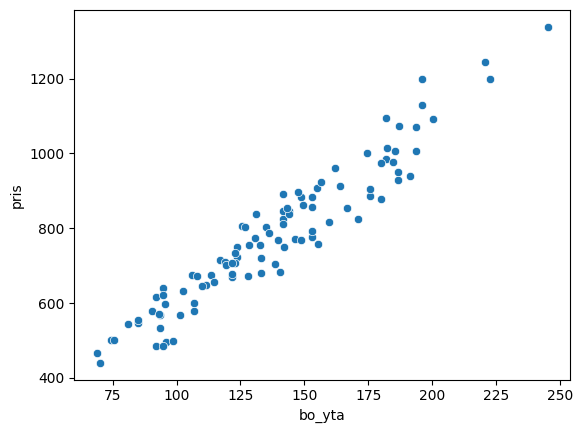

In [20]:
sns.scatterplot(Utrecht,x='bo_yta',y='pris')